In [14]:
# -*- coding: utf-8 -*-
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import brentq

In [15]:
np.random.seed(1) # random number seed

S0    = 100
r     = 0.02
T     = 1
sigma = 0.2
K     = 100
N     = 10000
days  = 252
q     = 0

## Q 1

### Q 1.1

In [16]:
# Q1.1
# Mean and variance of LogS
logS_mean = np.log(S0) + (r - 0.5*sigma**2) * T
logS_std = sigma * np.sqrt(T)

# Simulate Nx1 normal RVs
logST = np.random.normal(logS_mean, logS_std, N)

# Payoff of PUT for each simulation, and discounted to t=0
payoff_vector = np.exp(-r*T) * np.maximum(K - np.exp(logST), 0)

# GET the average as the value of PUT
Put_price = np.mean(payoff_vector).round(4)

print(f"The MC price using {N} simulations is {Put_price}.")

# Calculate the confidence interval
sig_payoff = np.std(payoff_vector)
CI_Put_U = (Put_price + norm.ppf(0.95)*sig_payoff/np.sqrt(N)).round(4)
CI_Put_L = (Put_price - norm.ppf(0.95)*sig_payoff/np.sqrt(N)).round(4)
CI = [CI_Put_L,CI_Put_U]
print("A 90% confidence band for the MC price is", CI)
print(f"The width of the confidence band is {(CI[1] - CI[0]).round(4)}.")


The MC price using 10000 simulations is 6.8277.
A 90% confidence band for the MC price is [6.6694, 6.986]
The width of the confidence band is 0.3166.


### Q 1.2

In [17]:
#1.2

X = np.random.normal(0, logS_std, N)
logS1 = logS_mean + X
logS2 = logS_mean - X
payoff_vector_av = 0.5 * (np.maximum(K - np.exp(logS1), 0) + np.maximum(K - np.exp(logS2), 0))

# mean
Put_av = (np.exp(-r*T) * np.mean(payoff_vector_av)).round(4)

#standard deviation
sigv_av = np.std(payoff_vector_av)

#Confidence Interval
CI_av_U = (Put_av + norm.ppf(0.95)*sigv_av/np.sqrt(N)).round(4)
CI_av_L = (Put_av - norm.ppf(0.95)*sigv_av/np.sqrt(N)).round(4)

CI_av = [CI_av_L , CI_av_U]
print('The MC price using anthithetic variables is', Put_av)
print('A 90% confidence band for the MC price using anthithetic variables is', CI_av)
print('The width of the confidence band is', (CI_av_U - CI_av_L).round(4))

The MC price using anthithetic variables is 6.9603
A 90% confidence band for the MC price using anthithetic variables is [6.88, 7.0406]
The width of the confidence band is 0.1606


### Q 1.3

In [31]:
#1.3
np.random.seed(1)
dt = T/252
logS_matrix = np.zeros((N,253))
logS_matrix[:,0] = np.log(S0)
logS_std_day = sigma * np.sqrt(dt)

# build 10000 stock paths in 252 days 
for day in range(1,253):
    logS_matrix[:,day] = np.random.normal(logS_matrix[:,day-1]+(r - 0.5 * sigma**2) * dt, logS_std_day)

#build Stockprice Matrix
S_matrix = np.exp(logS_matrix)

#build payoff matrix
payoff_matrix = np.exp(-r*T) * np.maximum(K - np.exp(logS_matrix[:,-1]), 0)

# find the path including 150
rows_greater_than_150 = np.where(np.any(S_matrix >= 150, axis=1))[0].tolist()
 
# make payoff = 0, according to path including 150
payoff_barrier_matrix = payoff_matrix
payoff_barrier_matrix[rows_greater_than_150] = 0

price_barrier_option = (payoff_barrier_matrix.mean()).round(4)
price_barrier_option_std = payoff_barrier_matrix.std()

CI_barrier_U =  (price_barrier_option + norm.ppf(0.95)*price_barrier_option_std/np.sqrt(N)).round(4)
CI_barrier_L =  (price_barrier_option - norm.ppf(0.95)*price_barrier_option_std/np.sqrt(N)).round(4)

print(f"The MC price for barrier option using {N} simulations is {price_barrier_option}.")
print('A 90% confidence band for the MC price of barrier option is', [CI_barrier_L, CI_barrier_U])
print('The width of the confidence band is', (CI_barrier_U - CI_barrier_L).round(4))

The MC price for barrier option using 10000 simulations is 6.8984.
A 90% confidence band for the MC price of barrier option is [6.7401, 7.0567]
The width of the confidence band is 0.3166


In [30]:
pd.DataFrame(payoff_matrix)

,0
0,19.955037
1,28.275765
2,13.899207
3,11.710977
4,6.935929
...,...
9995,7.573135
9996,13.030087
9997,21.641525
9998,0.000000


In [19]:
# EU in 252 days
price_EU = (payoff_matrix.mean()).round(4)
price_EU_std = payoff_matrix.std()

CI_EU_U =  (price_EU + norm.ppf(0.95)*price_EU_std/np.sqrt(N)).round(4)
CI_EU_L =  (price_EU - norm.ppf(0.95)*price_EU_std/np.sqrt(N)).round(4)

print(f"The MC price for EU option using {N} simulations in 252 days is {price_EU}.")
print('A 90% confidence band for the MC price of barrier option is', [CI_EU_L, CI_EU_U])
print('The width of the confidence band is', (CI_EU_U - CI_EU_L).round(4))

The MC price for EU option using 10000 simulations in 252 days is 6.8984.
A 90% confidence band for the MC price of barrier option is [6.7401, 7.0567]
The width of the confidence band is 0.3166


In [20]:
# find >150, = 100 in the end
rows_150_100 = np.where((np.any(S_matrix == 150, axis=1)) & (S_matrix[:, -1] < 100))[0].tolist()
rows_150_100

[]

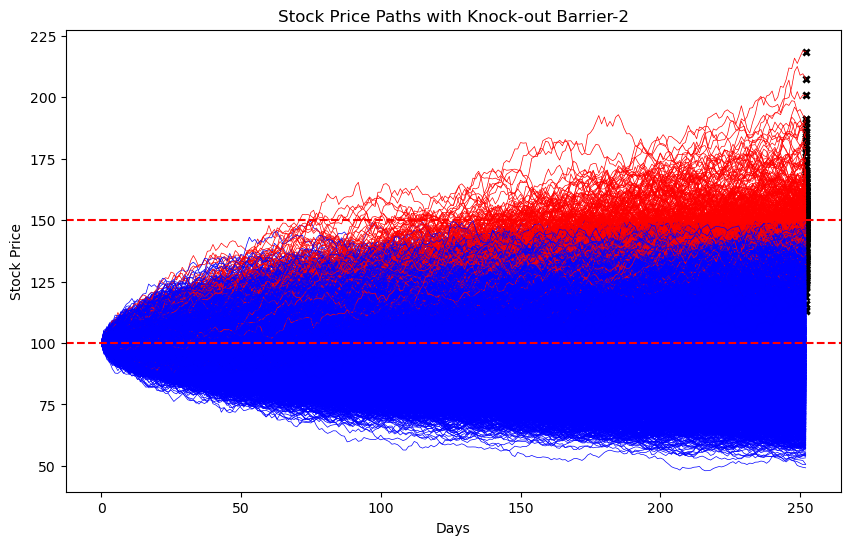

In [34]:

plt.figure(figsize=(10, 6))

for i in range(10000):
    if i in rows_greater_than_150:
        plt.plot(range(253),S_matrix[i, :], linewidth = 0.5, color='red')  # 将满足条件的线加粗且颜色为黑色
        plt.scatter(252,S_matrix[i, -1], marker='x', color='black', s=20, linewidth=2)
    else:
        plt.plot(range(253), S_matrix[i, :], linewidth=0.5,color="blue")  # 其他线的颜色为灰色
plt.axhline(y=150, color='r', linestyle='--')
plt.axhline(y=100, color='r', linestyle='--')
plt.title('Stock Price Paths with Knock-out Barrier-2')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.show()


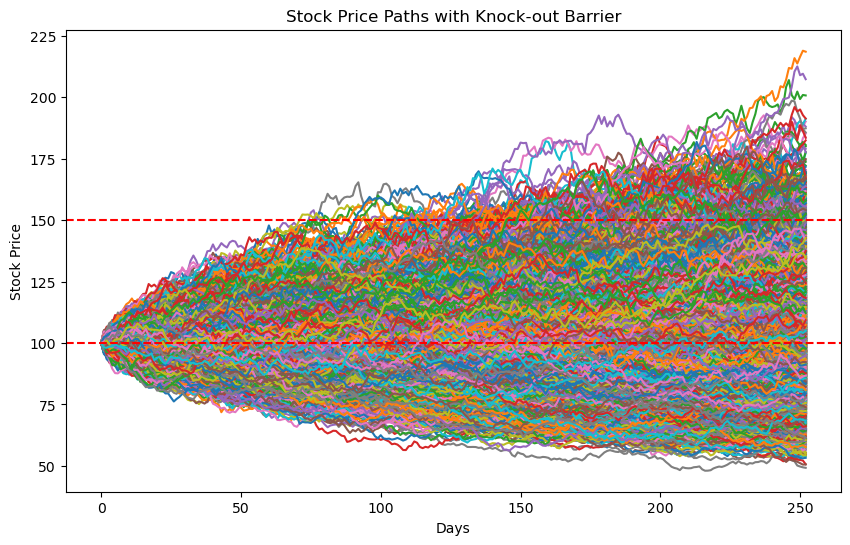

In [37]:
plt.figure(figsize = (10,6))
for i in range(N):
    plt.plot(S_matrix[i, :])
plt.axhline(y=150, color='r', linestyle='--')
plt.axhline(y=100, color='r', linestyle='--')
plt.title('Stock Price Paths with Knock-out Barrier')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.show()

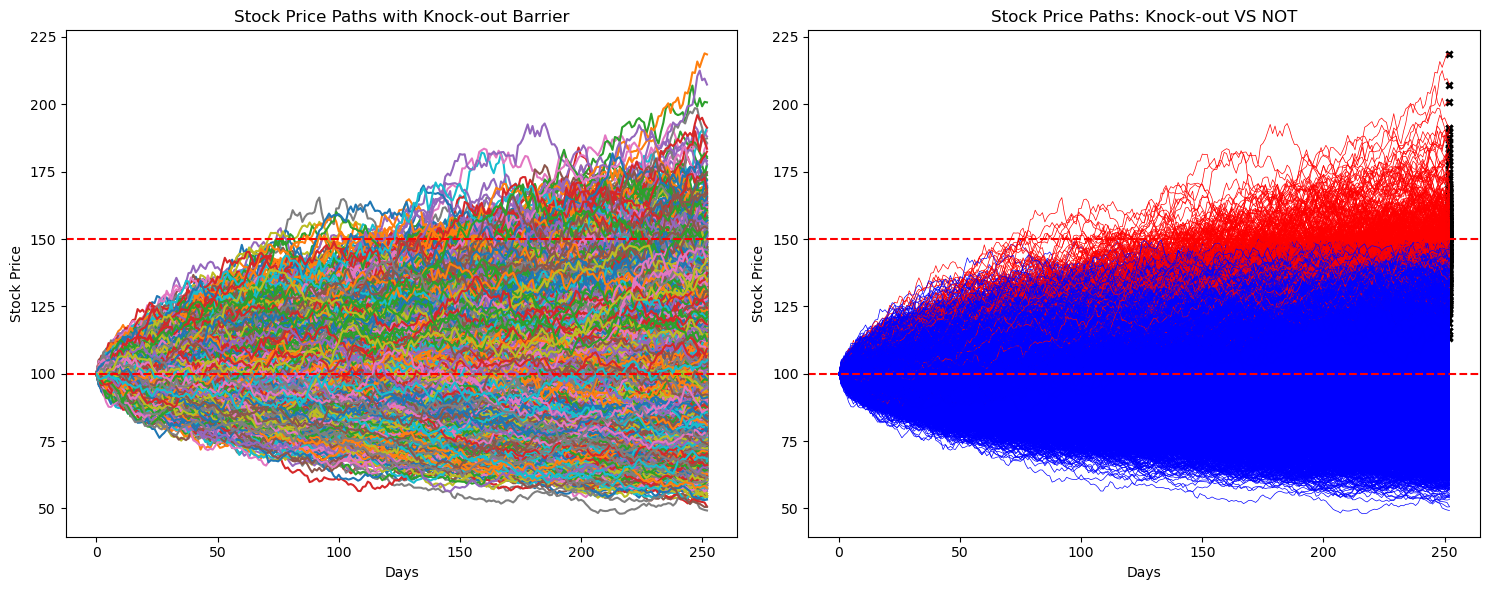

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming rows_greater_than_150 and S_matrix are defined

# Create a figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Stock Price Paths with Knock-out Barrier
axs[0].set_title('Stock Price Paths with Knock-out Barrier')
axs[0].set_xlabel('Days')
axs[0].set_ylabel('Stock Price')

for i in range(N):
    axs[0].plot(S_matrix[i, :])

axs[0].axhline(y=150, color='r', linestyle='--')
axs[0].axhline(y=100, color='r', linestyle='--')


# Subplot 2: Stock Price Paths with Knock-out Barrier-2
axs[1].set_title('Stock Price Paths: Knock-out VS NOT')
axs[1].set_xlabel('Days')
axs[1].set_ylabel('Stock Price')

for i in range(10000):
    if i in rows_greater_than_150:
        axs[1].plot(range(253), S_matrix[i, :], linewidth=0.5, color='red')
        axs[1].scatter(252, S_matrix[i, -1], marker='x', color='black', s=20, linewidth=2)
    else:
        axs[1].plot(range(253), S_matrix[i, :], linewidth=0.5, color="blue")

axs[1].axhline(y=150, color='r', linestyle='--')
axs[1].axhline(y=100, color='r', linestyle='--')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the figure
plt.show()


### Q 1.4 (Useless)

In [252]:
# # # 1.4


# def CIW_barrier(S0,K,r,sigma,N,T,sig):
#     np.random.seed(1)
#     dt = T/252
#     logS_matrix = np.zeros((int(N),253))
#     logS_matrix[:,0] = np.log(S0)
#     logS_std_day = sigma * np.sqrt(dt)

#     # build 10000 stock paths in 252 days 
#     for day in range(1,253):
#         logS_matrix[:,day] = np.random.normal(logS_matrix[:,day-1]+(r - 0.5 * sigma**2) * dt, logS_std_day)

#     #build Stockprice Matrix
#     S_matrix = np.exp(logS_matrix)

#     # find the path including 150
#     rows_greater_than_150 = np.where(np.any(S_matrix >= 150, axis=1))[0].tolist()

#     payoff_matrix = np.exp(-r*T) * np.maximum(K - np.exp(logS_matrix[:,-1]), 0)
#     payoff_matrix[rows_greater_than_150] = 0

#     price_barrier_option = payoff_matrix.mean()
#     price_barrier_option_std = payoff_matrix.std()

#     CI_barrier_u =  (price_barrier_option + norm.ppf(1-(1-sig)/2)*price_barrier_option_std/np.sqrt(N))
#     CI_barrier_l =  (price_barrier_option - norm.ppf(1-(1-sig)/2)*price_barrier_option_std/np.sqrt(N))
#     return CI_barrier_u - CI_barrier_l

# CIW_barrier(S0=100,K=100,r=0.02,sigma=0.2,N=10000,T=1,sig=0.9)




# def minimum_N(S0,K,r,sigma,T,sig,C):
#     def objective(N):
#         return CIW_barrier(S0,K,r,sigma,N,T,sig) - C
#     return brentq(objective,10000000,15000000)

# minimum_N(S0=100,K=100,r=0.02,sigma=0.2,T=1,sig=0.9,C=0.01)

In [12]:
# ## Confidence Interval width under EU put option in 252 days
# def CIW_EU(S0,K,r,sigma,N,T):
#     np.random.seed(1)
#     dt = T/252
#     logS_matrix = np.zeros((int(N),253))
#     logS_matrix[:,0] = np.log(S0)
#     logS_std_day = sigma * np.sqrt(dt)

#     # build 10000 stock paths in 252 days 
#     for day in range(1,253):
#         logS_matrix[:,day] = np.random.normal(logS_matrix[:,day-1]+(r - 0.5 * sigma**2) * dt, logS_std_day)

#     #build Stockprice Matrix
#     S_matrix = np.exp(logS_matrix)
    
#     #payoff vector
#     payoff_matrix = np.exp(-r*T) * np.maximum(K - np.exp(logS_matrix[:,-1]), 0)
    
#     price_EU = (payoff_matrix.mean()).round(4)
#     price_EU_std = payoff_matrix.std()

#     CI_EU_U =  (price_EU + norm.ppf(0.95)*price_EU_std/np.sqrt(N)).round(4)
#     CI_EU_L =  (price_EU - norm.ppf(0.95)*price_EU_std/np.sqrt(N)).round(4)
#     width = CI_EU_U - CI_EU_L
#     return width
# N = 1000000
# width_EU = CIW_EU(S0,K,r,sigma,N,T)

In [34]:
# def minimum_N(S0,K,r,sigma,N,T,C):
#     def objective(N):
#         return CIW_EU(S0,K,r,sigma,int(N),T) - C
#     return brentq(objective,10000000,15000000)

# minimum_N(S0,K,r,sigma,N,T,C=0.01)

In [ ]:
# ## PROVE the width between 
# width_EU = CIW_EU(S0,K,r,sigma,N,T)
# print(width_EU)

In [ ]:
# ## Confidence Interval width under EU put option in one year
# def CIW_EU_year(S0,K,r,sigma,N,T)
#     logS_mean = np.log(S0) + (r - 0.5*sigma**2) * T
#     logS_std = sigma * np.sqrt(T)

#     # Simulate Nx1 normal RVs
#     logST = np.random.normal(logS_mean, logS_std, N)

#     # Payoff of PUT for each simulation, and discounted to t=0
#     payoff_vector = np.exp(-r*T) * np.maximum(K - np.exp(logST), 0)

#     # GET the average as the value of PUT
#     Put_price = np.mean(payoff_vector)

#     # Calculate the confidence interval
#     sig_payoff = np.std(payoff_vector)
#     CI_Put_U = (Put_price + norm.ppf(0.95)*sig_payoff/np.sqrt(N))
#     CI_Put_L = (Put_price - norm.ppf(0.95)*sig_payoff/np.sqrt(N))
#     width = CI_Put_U - CI_Put_L
#     return width

# CIW_EU_year(S0,K,r,sigma,N,T)

### Q 2

### Q 2.1

In [32]:
# Q2.1
#build N*252 stock price paths
def S_matrix_function(S0,r,sigma,T,days,N):
    np.random.seed(1)
    dt = 1/days
    logS_matrix = np.zeros((N,days+1))
    logS_matrix[:,0] = np.log(S0)
    logS_std_day = sigma/T * np.sqrt(dt)

    # build 10000 stock paths in 252 days 
    for day in range(1,253):
        logS_matrix[:,day] = np.random.normal(logS_matrix[:,day-1]+(r - 0.5 * sigma**2) * dt, logS_std_day)

    #build Stockprice Matrix
    S_matrix = np.exp(logS_matrix)
    
    return S_matrix 

# calculate the K vector
def Asian_K_function(S_matrix,N):
    Asian_K = np.zeros(N)
    for path in range(N):
        Asian_K[path] = S_matrix[path,1:].mean()
    return Asian_K 

# Get the payoff -  MAX(K-S_252,0)
def Asian_payoff(S_matrix,Asian_K,r,T):
    payoff_vector = np.exp(-r*T) * np.maximum((Asian_K - S_matrix[:,-1]), 0)
    Asian_payoff = payoff_vector.mean()
    return payoff_vector,Asian_payoff

S_matrix = S_matrix_function(S0,r,sigma,T,days,N)
Asian_K = Asian_K_function(S_matrix,N)
Asian , p_Asian = Asian_payoff(S_matrix,Asian_K,r,T)

std_Asian = np.std(Asian)
CI = [p_Asian - norm.ppf(0.975) * std_Asian / np.sqrt(N), p_Asian + norm.ppf(0.975) * std_Asian / np.sqrt(N)]

print(p_Asian,CI)


4.0837323603153965 [3.972566141439812, 4.194898579190981]


### Q 2.2

In [161]:
#Q2.2
def bls_put_price(S0, K, r, T, sigma, q):
    d1 = (np.log(S0 / K) + (r - q + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S0 * np.exp(-q * T) * norm.cdf(-d1)
    return put_price

convariable_true = blsprice(S0, K, r, T, sigma, q)

def EU_put_mon(r,T,K,S_matrix):
    payoff_vector = np.exp(-r*T) * np.maximum((K-S_matrix[:,-1]),0)
    EU_put = payoff_vector.mean()
    return payoff_vector,EU_put 

convariable,p_convariable = EU_put_mon(r,T,K,S_matrix)


std_convariable = np.std(convariable)
covar = np.cov(Asian, convariable)
beta = -covar[0, 1] / (std_convariable ** 2)
P_Asian = p_Asian + beta*(p_convariable - convariable_true)

sigcov = np.std(Asian + beta*(convariable - convariable_true))
CI = [P_Asian - norm.ppf(0.975) * sigcov / np.sqrt(N), P_Asian + norm.ppf(0.975) * sigcov / np.sqrt(N)]

CI



[4.029254312898785, 4.172131588923533]

In [237]:
delta_lst = []
for sigma in np.arange(0.1, 0.3, 0.005):
    S_matrix = S_matrix_function(S0,r,sigma,T,days,N)
    Asian_K = Asian_K_function(A,N)
    Asian , p_Asian = Asian_payoff(S_matrix,Asian_K,r,T)
    
    std_Asian = np.std(Asian)
    CI_1_L = (p_Asian - norm.ppf(0.975) * std_Asian / np.sqrt(N)).round(4)
    CI_1_U = (p_Asian + norm.ppf(0.975) * std_Asian / np.sqrt(N)).round(4)
    CI_1 = [CI_1_L,CI_1_U]
    width_1 = (CI_1_U-CI_1_L).round(4)
    
    convariable_true = blsprice(S0, K, r, T, sigma, q)
    convariable,p_convariable = EU_put_mon(r,T,K,S_matrix)
    
    std_convariable = np.std(convariable)
    covar = np.cov(Asian, convariable)
    beta = -covar[0, 1] / (std_convariable ** 2)
    P_Asian = p_Asian + beta*(p_convariable - convariable_true)

    sigcov = np.std(Asian + beta*(convariable - convariable_true))
    CI_2_L = (P_Asian - norm.ppf(0.975) * sigcov / np.sqrt(N)).round(4)
    CI_2_U = (P_Asian + norm.ppf(0.975) * sigcov / np.sqrt(N)).round(4)
    CI_2 = [CI_2_L,CI_2_U]
    width_2 = (CI_2_U-CI_2_L).round(4)
    
    delta_width = width_1 - width_2  ### The differences between CI1 & CI2   
    delta_lst.append({'sigma': sigma, 'CI_1': CI_1, 'CI_1_L':CI_1_L, 'CI_1_U':CI_1_U,'CI_2': CI_2, 
                      'CI_2_L':CI_2_L,'CI_2_U':CI_2_U,'width_1': width_1, 'width_2': width_2,'delta_width' :delta_width})
    
    # print(CI_1,CI_2,width_1,width_2,delta_width)
delta_df = pd.DataFrame(delta_lst)

In [238]:
delta_df

,sigma,CI_1,CI_1_L,CI_1_U,CI_2,CI_2_L,CI_2_U,width_1,width_2,delta_width
0,0.100,"[1.8048, 1.929]",1.8048,1.9290,"[1.8043, 1.9285]",1.8043,1.9285,0.1242,0.1242,0.0000
1,0.105,"[1.812, 1.9356]",1.8120,1.9356,"[1.8124, 1.936]",1.8124,1.9360,0.1236,0.1236,0.0000
2,0.110,"[1.8356, 1.9595]",1.8356,1.9595,"[1.8371, 1.9606]",1.8371,1.9606,0.1239,0.1235,0.0004
3,0.115,"[1.8753, 2.0003]",1.8753,2.0003,"[1.878, 2.0019]",1.8780,2.0019,0.1250,0.1239,0.0011
4,0.120,"[1.9285, 2.0555]",1.9285,2.0555,"[1.9328, 2.0574]",1.9328,2.0574,0.1270,0.1246,0.0024
5,0.125,"[1.9945, 2.1244]",1.9945,2.1244,"[2.0006, 2.1262]",2.0006,2.1262,0.1299,0.1256,0.0043
6,0.130,"[2.0728, 2.2061]",2.0728,2.2061,"[2.081, 2.2077]",2.0810,2.2077,0.1333,0.1267,0.0066
7,0.135,"[2.1626, 2.3001]",2.1626,2.3001,"[2.1732, 2.3012]",2.1732,2.3012,0.1375,0.1280,0.0095
8,0.140,"[2.2639, 2.4061]",2.2639,2.4061,"[2.2772, 2.4065]",2.2772,2.4065,0.1422,0.1293,0.0129
9,0.145,"[2.3752, 2.5225]",2.3752,2.5225,"[2.3913, 2.5219]",2.3913,2.5219,0.1473,0.1306,0.0167


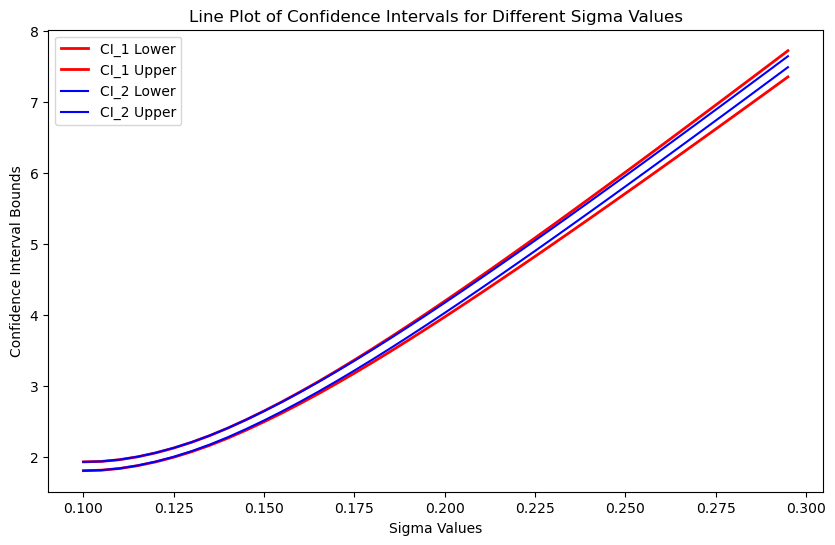

In [241]:
# 提取数据
sigma_values = delta_df['sigma']
ci_1_lower = delta_df['CI_1_L']
ci_1_upper = delta_df['CI_1_U']
ci_2_lower = delta_df['CI_2_L']
ci_2_upper = delta_df['CI_2_U']

# 创建折线图
plt.figure(figsize=(10, 6))

# 绘制四条折线
plt.plot(sigma_values, ci_1_lower, label='CI_1 Lower',color = 'r',linewidth=2)
plt.plot(sigma_values, ci_1_upper, label='CI_1 Upper',color = 'r',linewidth=2)
plt.plot(sigma_values, ci_2_lower, label='CI_2 Lower',color = 'b')
plt.plot(sigma_values, ci_2_upper, label='CI_2 Upper',color = 'b')

# 添加 x 轴标签
plt.xlabel('Sigma Values')

# 添加 y 轴标签
plt.ylabel('Confidence Interval Bounds')

# 添加标题
plt.title('Line Plot of Confidence Intervals for Different Sigma Values')

# 添加图例
plt.legend()

# 显示图形
plt.show()


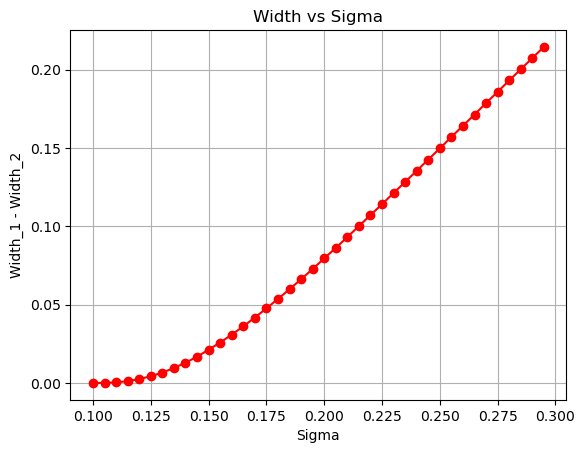

In [242]:
plt.plot(delta_df['sigma'], delta_df['delta_width'], marker='o', linestyle='-', color='r')
plt.title('Width vs Sigma')
plt.xlabel('Sigma')
plt.ylabel('Width_1 - Width_2')
plt.grid(True)
#plt.show()